In [2]:
from IPython.display import Image

### -- 필요사항 --

python, anaconda설치, RecSys가상환경생성, 필요한 강의자료와 강의 다운로드

In [1]:
# 추천시스템을 위한 surprise 패키지 설치
# !conda install -c conda-forge scikit-surprise

### -- Getting Started 요약 --

* 추천시스템은 매우 특정한 종류의 기계학습 시스템이다. 
* 머신러닝문제보다 일반적으로 적용가능하다. 구체적으로 사용자의 평점이나 취향을 예측하고, 이를 기반으로 물건을 추천하는 것이다.

* 추천시스템은 과거에 경험했던 상품을 보고 좋아할만한 상품을 추천한다. 사용자가 구매한 아이템을 보는 대신에 사용자의 패턴을 파악한다. 

* 방법1 explicit 피드백을 활용한다. 명시적 피드백은 좋아요/싫어요 또는 1,2,3,4,5점 같은 피드백이다. 이러한 데이터는 데이터가 너무 희소하고, 사람마다 기준이 다를 수 있다. 

* 방법2 implicit 데이터를 활용한다. 클릭같은 데이터인데 클릭하면 관심 표시로 해석한다. 하지만 클릭을 항상 신뢰할 수 있는 피드백은 아니다. 예를 들면, 봇이 있다. 하지만 구매하는 물건은 관심을 훨 씬 더 잘 나타낸다. 구매데이터는 정말 좋은 데이터다. 머무는 시간도 신뢰할만한 피드백이다. 

* Top N추천은 상위 N개의 추천 상품을 제공한다. 사용자는 항목에 대한 평가를 예측하고, 이를 보길 원하다. 상위 N개의 추천은 매우 중요한 부분이다. 

* 먼저, 사용자의 과거 행동을 기반으로 추천 후보군을 생성한다.  A를 좋아하는 사람이 B를 좋아하니 이러한 방법으로 추천 후보군을 얻는다. 어떤식으로든 결합시켜 추천 후보군을 만들어 내야한다.  

* 어려운 부분은 콘텐츠간의 유사성 데이터베이스를 구축하는 것임. 

* 아이템에 대한 quality, quantity 정보가 모두 필요하다.

### -- Evaluating Recommender System 요약--

* Train/Test and Cross Validation

머신러닝과 마찬가지로 Train/Test로 나누어 평가한다. 5-cross validation도 진행한다. 그보다 중요한건 과거 데이터에 대한 예측 후 평가이기 때문에 실제 현업에서 미래에 사용자에 대한 예측을 잘하는 것이라 확정지을 수 없으니! 이 부분에 더 집중하는게 바람직하다.

* RMSE, MAE

MAE는 실제 평점과 예측 평점 간의 차이의 절댓값들의 평균을 나타냄. RMSE는 제곱을 하는 부분이 차이인데, 오류에 더 민감하게 반응하게 된다. 중요한 것은 어떤 상품을 TOP N 목록에 잘 배치하고 사용자가 어떻게 반응하는지 살펴보는 것이다.

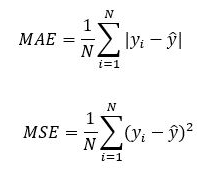

In [7]:
Image('C:/Users/USER/Documents/강의자료/추천시스템-udemy/image/mae_rmse.png')

* Top-N Hit Rate

Hit Rate는 사용자의 top-n추천 중 항목 하나가 실제로 사용자가 선택한거일때 이것을 Hit 했다고 한다. 위 지표보다 훨씬더 사용자 중심적 측정항목이라 할 수 있다. 매우 큰 데이터가 없으면 측정하기 힘든게 현실이다. 훨씬더 상위 rank에서 hit하면 더 높은 가중치를 준다.\
ARHR(Average Reciprocal Hit Rank)는 높은 top rank의 추천 성공에 높은 점수를 준다.

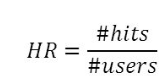

In [10]:
Image('C:/Users/USER/Documents/강의자료/추천시스템-udemy/image/hitrate.png')

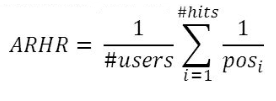

In [11]:
Image('C:/Users/USER/Documents/강의자료/추천시스템-udemy/image/arhr.png')

* Coverage, Diversity, Novelty

Coverage는 정확도와 상충할 수 있다. 즉 추천시스템에서 예측 가능한 상품이 얼마나 존재하는지이다. 그래서 정확도와 이 커버리지는 상충관계에 있다고 할 수 있다. \
Diversity는 (1-S)로 표현되고 S는 유사도 평균을 나타낸다. 상위 N개의 추천 목록에서 가능한 모든 쌍들에 대해 추천 항목들이 얼마나 유사한지를 나타낸다. 매우 높은 다양성을 추구할 수 있는데, 너무 높으면 추천 품질이 떨어질 수 있다. \
Novelty는 얼마나 인기가 있는지를 나타내는 척도이다. 무작위로 추천하면 Novelty는 매우 높다. 이 값이 높다는건 많은 사람들의 선택을 받은것이라 고려할만 하다.

* Churn, Responsiveness, A/B test

Churn은 얼마나 자주 추천이 변경되느냐를 말한다. 추천을 실질적으로 바꾸면 이탈 점수가 높아진다. 너무 오래 동일한 추천이 계속되면 무작위 추천으로 신섬함을 유지할 수도 있다. 다양성, 새로움과 마찬가지로 높은 이탈은 자체로 좋은 것은 아니다. 절충점을 잘 파악해야한다.\
Responsiveness는 새로운 사용자 행동이 얼마나 빨리 추천에 영향을 미치는지를 말한다. 즉각적반응은 복잡하고, 유지관리가 어렵고, 비용이 비싸다.\
A/B테스트는 가장 중요하다. 다양한 알고리즘으로 추천해 비교 가능하고, 온라인 실험으로 관심사를 파악할 수 있다. 비즈니스에 중요하고, 궁극적으로 사용자에게도 중요하다. A/B테스트 말고 오프라인에서는 절대 승리를 장담하지 말자.\

사용자한테 직접 물어보는 것도 있다.!! 명시적인 피드백을 요청할 수 있는것은 너무 좋은 방법이다!! 실제로 힘들지만,, 그래서 결국 온라인 A/B테스트를 고수하는 것이 가장 좋다.


온라인 A/B 테스트가 가장 좋다. 시뮬레이션이 아닌 실제 세계를 보자!

### 온라인 A/B 테스트가 가장 좋다.

## 온라인 A/B 테스트가 가장 좋다.

# 온라인 A/B 테스트가 가장 좋다.

#### 측정지표 함수 모음!

In [ ]:
import itertools

from surprise import accuracy
from collections import defaultdict

class RecommenderMetrics:

    def MAE(predictions):
        return accuracy.mae(predictions, verbose=False)

    def RMSE(predictions):
        return accuracy.rmse(predictions, verbose=False)

    # 상위 N개의 추천을 얻을 수 있음.
    def GetTopN(predictions, n=10, minimumRating=4.0):
        topN = defaultdict(list)


        for userID, movieID, actualRating, estimatedRating, _ in predictions:
            if (estimatedRating >= minimumRating):
                topN[int(userID)].append((int(movieID), estimatedRating))

        for userID, ratings in topN.items():
            ratings.sort(key=lambda x: x[1], reverse=True)
            topN[int(userID)] = ratings[:n]

        return topN

    def HitRate(topNPredicted, leftOutPredictions):
        hits = 0
        total = 0

        # For each left-out rating
        for leftOut in leftOutPredictions:
            userID = leftOut[0]
            leftOutMovieID = leftOut[1]
            # Is it in the predicted top 10 for this user?
            hit = False
            for movieID, predictedRating in topNPredicted[int(userID)]:
                if (int(leftOutMovieID) == int(movieID)):
                    hit = True
                    break
            if (hit) :
                hits += 1

            total += 1

        # Compute overall precision
        return hits/total

    
    def CumulativeHitRate(topNPredicted, leftOutPredictions, ratingCutoff=0):
        hits = 0
        total = 0

        # For each left-out rating
        for userID, leftOutMovieID, actualRating, estimatedRating, _ in leftOutPredictions:
            # Only look at ability to recommend things the users actually liked...
            if (actualRating >= ratingCutoff):
                # Is it in the predicted top 10 for this user?
                hit = False
                for movieID, predictedRating in topNPredicted[int(userID)]:
                    if (int(leftOutMovieID) == movieID):
                        hit = True
                        break
                if (hit) :
                    hits += 1

                total += 1

        # Compute overall precision
        return hits/total

    # 각 평점 유형에 대한 집계를 추적함.
    def RatingHitRate(topNPredicted, leftOutPredictions):
        hits = defaultdict(float)
        total = defaultdict(float)

        # For each left-out rating
        for userID, leftOutMovieID, actualRating, estimatedRating, _ in leftOutPredictions:
            # Is it in the predicted top N for this user?
            hit = False
            for movieID, predictedRating in topNPredicted[int(userID)]:
                if (int(leftOutMovieID) == movieID):
                    hit = True
                    break
            if (hit) :
                hits[actualRating] += 1

            total[actualRating] += 1

        # Compute overall precision
        for rating in sorted(hits.keys()):
            print (rating, hits[rating] / total[rating])

    #ARHR 지표
    def AverageReciprocalHitRank(topNPredicted, leftOutPredictions):
        summation = 0
        total = 0
        # For each left-out rating
        for userID, leftOutMovieID, actualRating, estimatedRating, _ in leftOutPredictions:
            # Is it in the predicted top N for this user?
            hitRank = 0
            rank = 0
            for movieID, predictedRating in topNPredicted[int(userID)]:
                rank = rank + 1
                if (int(leftOutMovieID) == movieID):
                    hitRank = rank
                    break
            if (hitRank > 0) :
                summation += 1.0 / hitRank

            total += 1

        return summation / total

    # What percentage of users have at least one "good" recommendation
    # 적어도 한번이라도 좋다는 표현을 한 사용자들의 비율
    def UserCoverage(topNPredicted, numUsers, ratingThreshold=0):
        hits = 0
        for userID in topNPredicted.keys():
            hit = False
            for movieID, predictedRating in topNPredicted[userID]:
                if (predictedRating >= ratingThreshold):
                    hit = True
                    break
            if (hit):
                hits += 1

        return hits / numUsers

    # 유사성 점수 행렬을 만들어 유사고 계산함. 모든 아이템쌍 조합에 대한 유사성을 구함.
    def Diversity(topNPredicted, simsAlgo):
        n = 0
        total = 0
        simsMatrix = simsAlgo.compute_similarities()
        for userID in topNPredicted.keys():
            pairs = itertools.combinations(topNPredicted[userID], 2)
            for pair in pairs:
                movie1 = pair[0][0]
                movie2 = pair[1][0]
                innerID1 = simsAlgo.trainset.to_inner_iid(str(movie1))
                innerID2 = simsAlgo.trainset.to_inner_iid(str(movie2))
                similarity = simsMatrix[innerID1][innerID2]
                total += similarity
                n += 1

        S = total / n
        return (1-S)

    # 모든 사용자의 상위 N개 추천리스트로 인기 순위의 평균을 계산함. 뭐가 인기있는 아이템인지 앎.
    def Novelty(topNPredicted, rankings):
        n = 0
        total = 0
        for userID in topNPredicted.keys():
            for rating in topNPredicted[userID]:
                movieID = rating[0]
                rank = rankings[movieID]
                total += rank
                n += 1
        return total / n
